In [75]:
# Importing the necessary Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [76]:
# Sending a request to the website
respond = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
respond

<Response [200]>

In [77]:
# Parsing the HTML content
soup = BeautifulSoup(respond.text,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by GDP (nominal) - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-

In [78]:
# The table that I'm interested in is the third table after find_all('tbody') 
# so by deteching the HTML content according to table[2] it can be acheived
table = soup.find_all('table')[2]
table

<table class="wikitable sortable sticky-header-multi static-row-numbers" style="text-align:right">
<caption>GDP (million US$) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15"><span class="cite-bracket">[</span>13<span class="cite-bracket">]</span></a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16"><span class="cite-bracket">[</span>14<span class="cite-bracket">]</span></a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Na

In [79]:
# Searching for the all the rows in the table
rows = table.find_all('tr')
rows

[<tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
 <th rowspan="2">Country/Territory
 </th>
 <th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15"><span class="cite-bracket">[</span>13<span class="cite-bracket">]</span></a></sup>
 </th>
 <th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16"><span class="cite-bracket">[</span>14<span class="cite-bracket">]</span></a></sup>
 </th>
 <th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17-0"><a href="#cite_note-UN-17"><span class="cite-bracket">[</span>15<span class="cite-bracket">]<

In [80]:
# While inspecting the website, some cells were merged as "colspan=2" which need to be handled
dataset = []
for row in rows[1:]:
    cells = row.find_all(['td'])   
    if cells:
        row_data = []  # Temporary list to hold row's data
        for cell in cells:
            colspan = int(cell.get('colspan', 1))  # Retrieving the desired headings in and set as colspan 1
            cell_text = cell.text.strip()  # Extracting text from the cell
            
            # Append the cell's text
            row_data.append(cell_text)
            
            # Adding placeholders for merged columns (colspan > 1)
            for _ in range(colspan - 1):
                row_data.append("")  # Adding empty strings for each merged column
        
        # Ensuring that the row has the correct number of columns
        while len(row_data) < 7:  # Based on the number of column 
            row_data.append("")  # Add additional placeholders for missing columns
        
        # Appending the processed row data to the dataset
        dataset.append(row_data[:7])  # Limiting to exactly 7 columns to avoid IndexError

In [81]:
# Setting the dataframe based on the columns in the dataset collected from the website table
df = pd.DataFrame(dataset, columns = ['Country_Territory', 'Forecast', 'Year', 'Estimate', 'Year', 'Estimate', 'Year'])
df

,Country_Territory,Forecast,Year,Estimate,Year,Estimate,Year
0,World,"110,047,109",2024,"105,435,540",2023,"100,834,796",2022
1,United States,"29,167,779",2024,"27,360,935",2023,"25,744,100",2022
2,China,"18,273,357",[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,"4,710,032",2024,"4,456,081",2023,"4,076,923",2022
4,Japan,"4,070,094",2024,"4,212,945",2023,"4,232,173",2022
...,...,...,...,...,...,...,...
205,Kiribati,311,2024,279,2023,223,2022
206,Palau,308,2024,263,2023,225,2022
207,Marshall Islands,305,2024,284,2023,279,2022
208,Nauru,161,2024,154,2023,147,2022


In [82]:
df = df.rename(columns={'Year':'GDP_Year'})
df

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,"110,047,109",2024,"105,435,540",2023,"100,834,796",2022
1,United States,"29,167,779",2024,"27,360,935",2023,"25,744,100",2022
2,China,"18,273,357",[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,"4,710,032",2024,"4,456,081",2023,"4,076,923",2022
4,Japan,"4,070,094",2024,"4,212,945",2023,"4,232,173",2022
...,...,...,...,...,...,...,...
205,Kiribati,311,2024,279,2023,223,2022
206,Palau,308,2024,263,2023,225,2022
207,Marshall Islands,305,2024,284,2023,279,2022
208,Nauru,161,2024,154,2023,147,2022


In [83]:
# Changing the data type from object to numeric
df['Forecast'] = df['Forecast'].str.replace(',',"", regex=True).apply(pd.to_numeric, errors='coerce')
df

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022
4,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022
...,...,...,...,...,...,...,...
205,Kiribati,311.0,2024,279,2023,223,2022
206,Palau,308.0,2024,263,2023,225,2022
207,Marshall Islands,305.0,2024,284,2023,279,2022
208,Nauru,161.0,2024,154,2023,147,2022


In [84]:
# Saving the new cleaned dataset as a csv to a location in my drive
df.to_csv("C:\\Users\\Sidne\\OneDrive\\Desktop\\Semester3-V2\\ListOfCountriesByGDP.csv",index=False)

In [85]:
# Typo
df.loc[3, ['Country_Territory', 'Forecast']] = ['JUrmaNee', 'formilliononehundredandthirtytwo']
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,JUrmaNee,formilliononehundredandthirtytwo,2024,"4,456,081",2023,"4,076,923",2022
4,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022


In [86]:
# Typo Fix
df.loc[3, ['Country_Territory', 'Forecast']] = ['Germany', 4710032.0]
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022
4,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022


In [87]:
# Column Duplicate
df['2Country_Territories'] = df['Country_Territory']
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year,2Country_Territories
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022,World
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022,United States
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022,China
3,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022,Germany
4,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022,Japan


In [88]:
# Column Duplicate Fix
df = df.drop('2Country_Territories', axis=1)
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022
4,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022


In [89]:
# Row Duplicate 
Row_Duplicate = df.iloc[[2]]
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022
4,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022


In [90]:
# Concatenate the selected row with the original dataframe 
df = pd.concat([Row_Duplicate, df]) 
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022


In [91]:
# Sort the dataframe to place the duplicated row at the beginning 
df = df.sort_index().reset_index(drop=True)
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
4,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022


In [92]:
# Row Duplicate Fix
df = df.drop_duplicates()
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
4,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022
5,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022


In [93]:
# Data Type Error
df['Forecast'] = df['Forecast'].astype(str)

In [94]:
# Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 210
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country_Territory  210 non-null    object
 1   Forecast           210 non-null    object
 2   GDP_Year           210 non-null    object
 3   Estimate           210 non-null    object
 4   GDP_Year           210 non-null    object
 5   Estimate           210 non-null    object
 6   GDP_Year           210 non-null    object
dtypes: object(7)
memory usage: 13.1+ KB


In [95]:
# Data Type Fix
df['Population_Forecast2023'] = pd.to_numeric(df['Forecast'], errors='coerce')

In [96]:
# Checking Data Type Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 210
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Territory        210 non-null    object 
 1   Forecast                 210 non-null    object 
 2   GDP_Year                 210 non-null    object 
 3   Estimate                 210 non-null    object 
 4   GDP_Year                 210 non-null    object 
 5   Estimate                 210 non-null    object 
 6   GDP_Year                 210 non-null    object 
 7   Population_Forecast2023  195 non-null    float64
dtypes: float64(1), object(7)
memory usage: 14.8+ KB


In [97]:
# Displaying the first few rows
df.head()

,Country_Territory,Forecast,GDP_Year,Estimate,GDP_Year,Estimate,GDP_Year,Population_Forecast2023
0,World,110047109.0,2024,"105,435,540",2023,"100,834,796",2022,110047109.0
1,United States,29167779.0,2024,"27,360,935",2023,"25,744,100",2022,29167779.0
2,China,18273357.0,[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022,18273357.0
4,Germany,4710032.0,2024,"4,456,081",2023,"4,076,923",2022,4710032.0
5,Japan,4070094.0,2024,"4,212,945",2023,"4,232,173",2022,4070094.0


In [98]:
# Filling missing values with the mode
df['Forecast'].fillna(df['Forecast'].mode()[0], inplace = True)

In [99]:
F_Mode = df['Forecast'].median()
F_Mode

47147.0

In [100]:
# Correcting incorrect values via replace
df['Forecast'].replace('nan', '47147.0', inplace=True)

In [101]:
df['Forecast'].unique()

array(['110047109.0', '29167779.0', '18273357.0', '4710032.0',
       '4070094.0', '3889130.0', '3587545.0', '3174099.0', '2376510.0',
       '2214796.0', '2188419.0', '2184316.0', '1869916.0', '1848125.0',
       '1802006.0', '1731469.0', '1402590.0', '1344318.0', '1218401.0',
       '1100706.0', '942265.0', '862908.0', '775017.0', '662183.0',
       '609039.0', '604382.0', '560566.0', '545053.0', '535804.0',
       '530708.0', '528919.0', '528067.0', '503752.0', '470062.0',
       '468485.0', '451468.0', '439748.0', '434243.0', '417207.0',
       '412293.0', '403045.0', '401751.0', '380561.0', '380044.0',
       '374595.0', '342992.0', '328720.0', '306083.0', '303032.0',
       '292553.0', '283309.0', '264149.0', '260134.0', '252732.0',
       '252236.0', '228806.0', '221406.0', '199721.0', '184099.0',
       '161822.0', '157087.0', '47147.0', '145031.0', '142617.0',
       '126238.0', '121425.0', '120971.0', '116321.0', '113286.0',
       '112653.0', '112369.0', '109993.0', '108425.

In [103]:
# Changing the data type from object to numeric
df['Forecast'] = df['Forecast'].str.replace(',',"", regex=True).apply(pd.to_numeric, errors='coerce')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 210
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Territory        210 non-null    object 
 1   Forecast                 210 non-null    float64
 2   GDP_Year                 210 non-null    object 
 3   Estimate                 210 non-null    object 
 4   GDP_Year                 210 non-null    object 
 5   Estimate                 210 non-null    object 
 6   GDP_Year                 210 non-null    object 
 7   Population_Forecast2023  195 non-null    float64
dtypes: float64(2), object(6)
memory usage: 14.8+ KB


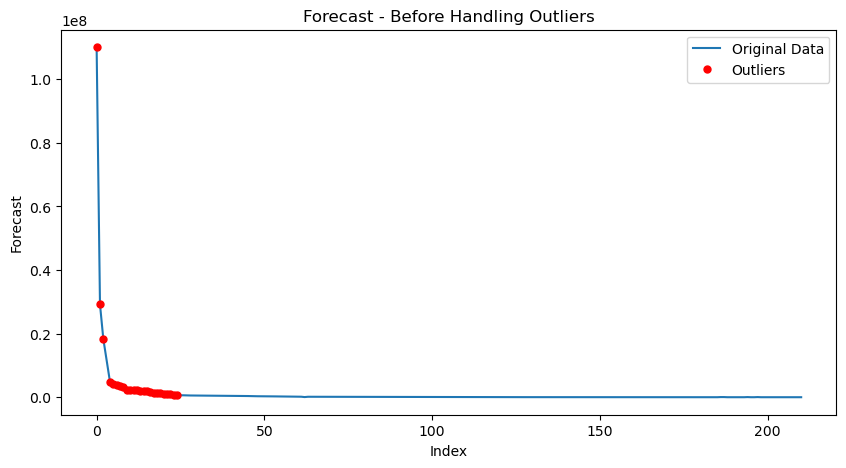

In [106]:
# Importing Library necessary for peforming the plotting of graphs
import matplotlib.pyplot as plt
# Calculating the IQR for Outlier Detection
Q1 = df['Forecast'].quantile(0.25)
Q3 = df['Forecast'].quantile(0.75)
IQR = Q3 - Q1
# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# For filtering any anomalies
df['Anomaly_IQR'] = (df['Forecast'] < lower_bound) | (df['Forecast'] > upper_bound )

# Ploting the data before handling the outliers
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Forecast'], label='Original Data')
plt.plot(df[df['Anomaly_IQR']].index, df[df['Anomaly_IQR']]['Forecast'], 'ro', markersize=5, label='Outliers')

# Setting the labels, title, and legend
plt.xlabel('Index')  
plt.ylabel('Forecast') 
plt.title('Forecast - Before Handling Outliers')  
plt.legend()
plt.show()

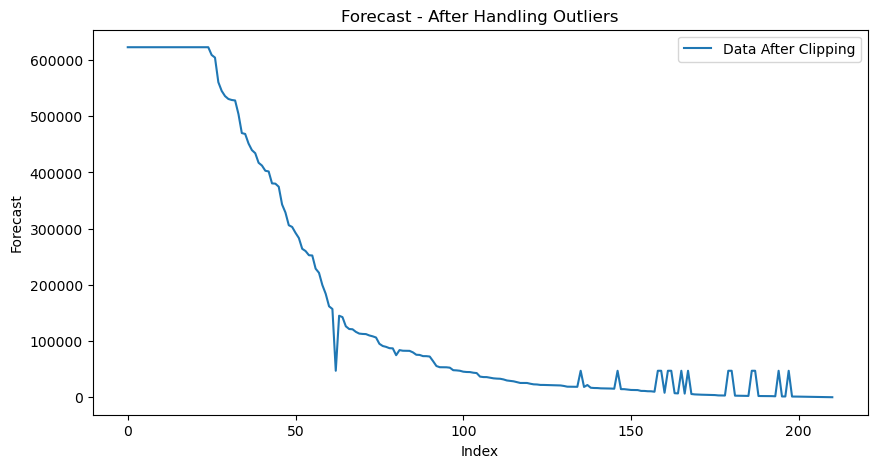

In [107]:
# Handling the outliers by clipping
df['Forecast'] = df['Forecast'].clip(lower=lower_bound, upper=upper_bound)

# Plotting the data after handling the outliers to view the change
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Forecast'], label='Data After Clipping')

# Setting the labels, title, and legend
plt.xlabel('Index') 
plt.ylabel('Forecast')
plt.title('Forecast - After Handling Outliers')
plt.legend()
plt.show()